# Libraries

In [0]:
!pip install imageio

In [0]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity
import scipy.ndimage as nd
from skimage import io, viewer, color, exposure
import scipy.signal
import cv2

# Computer Vision



Select an RGB image of your choosing from somewhere on the internet. 

Import the image and display it.

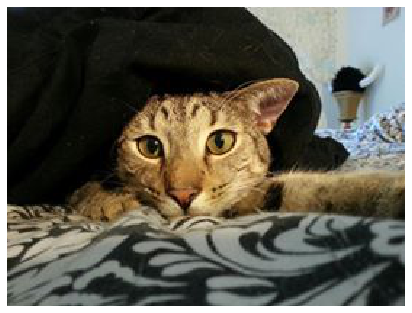

In [0]:
img = imageio.imread('https://raw.githubusercontent.com/hjhuney/Data/master/cat001.jpg')
plt.imshow(img)
plt.xticks([]) 
plt.yticks([]);

In [0]:
img.shape

(206, 274, 3)

Generate a grayscale version of the image and display it again.

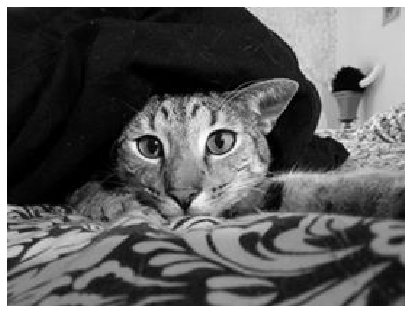

In [0]:
grayscale = rescale_intensity(color.rgb2gray(img))
plt.imshow(grayscale, cmap='gray')
plt.xticks([]) 
plt.yticks([]);

In [0]:
grayscale.shape

(206, 274)

In [0]:
grayscale[0].shape

(274,)

Use Canny Edge Detection to find the edges in the image. Display the Canny Edge Detection image. 

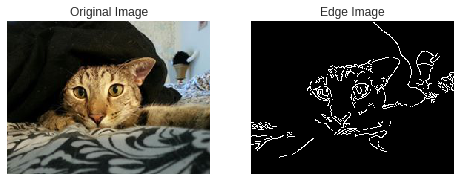

In [0]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(100, (1.0 - sigma) * v))
	upper = int(min(400, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

# img = cv2.imread('conv_image.png', 0)
cat_url = 'https://raw.githubusercontent.com/hjhuney/Data/master/cat001.jpg'
img = imageio.imread(cat_url)

edges = cv2.Canny(img, 175, 600)
# edges = auto_canny(img, sigma=0.5)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Compute the convolution of the image with the following Difference of Gaussian (DoG) filter: 


 First 5 columns and rows of the image_sharpen matrix: 
 [[ 167.3618  -43.5069   70.5451   70.7522   69.8297]
 [ -65.1089 -373.6022 -266.4763 -285.6313 -296.4871]
 [  69.179  -132.0408   15.4462    1.433     9.5732]
 [  63.2219 -113.92     17.6181    6.117    21.9011]
 [  62.8203  -83.8524   24.3877    6.025    10.3839]]


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


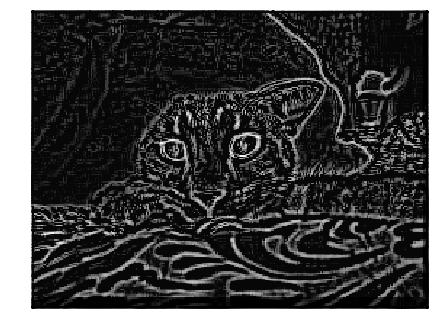

In [0]:
dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])


#     img = io.imread('image.png')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

# you can use 'valid' instead of 'same', then it will not add zero padding
image_sharpen = scipy.signal.convolve2d(img, dog_filter, 'same')
print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)

# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Deep Convolutional Neural Networks



Use the softmax function to transform the following vector to probability values:

$\begin{bmatrix}
4&5&9&2
\end{bmatrix}$

In [0]:
# vector
output_1d = [4.0, 5.0, 9.0, 2.0]

# softmax function
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

# softmax on vector
softmax_1d = softmax(output_1d)

# suppress scientific notation
np.set_printoptions(suppress=True)

# print results
print(softmax_1d)

[0.00656742 0.0178521  0.97469167 0.0008888 ]


Use the Keras library to classify the images of the MNIST-fashion dataset using a simple convolutional neural network. This dataset is just like MNIST but has grayscale images of different articles of clothing. It also has 10 classes, so any code that works on the MNIST dataset should work on this dataset without modification. I'll help you with the image preparation, and will limit the number of classes to 2 for fast training times. We will focus only on classifying pullovers and shirts.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# What are the dimensions of a single image?
print(x_train[0].shape)

# input image dimensions
img_rows, img_cols = 28,28

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Only look at 2s and 7s
num_classes = 2

# Create boolean arrays for train and test
train_picks = np.logical_or(y_train==2,y_train==6)
test_picks = np.logical_or(y_test==2,y_test==6)

# Filter train and test based on boolean arrays
x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==2,dtype=int)
y_test = np.array(y_test[test_picks]==2,dtype=int)

# Scale pixel values to be floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Using TensorFlow backend.


4423680/4422102 [==============================] - 3s 1us/step
(28, 28)
channels_first
x_train shape: (12000, 1, 28, 28)
12000 train samples
2000 test samples


In [0]:
# initializing the CNN
model = Sequential()

# first layer
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 

# 2nd convolutional layer
model.add(Conv2D(8, (3, 3), activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
              
# dropout               
model.add(Dropout(rate=0.25))               

# flattening step
model.add(Flatten())


# full connection layer
model.add(Dense(16, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))               
               
               
# compiling the CNN
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# # compiling the CNN
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
          
np.random.seed(42) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 26, 26)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 24, 24)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 12, 12)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 12, 12)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                18448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
__________

Plot your validation and test accuracies by epoch.

In [0]:
batch_size = 32
epochs = 20

model1_fitted = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 12000 samples, validate on 2000 samples
Epoch 1/20
12000/12000 [==============================] - 3s 282us/step - loss: 0.2540 - acc: 0.8963 - val_loss: 0.2373 - val_acc: 0.9005
Epoch 2/20
12000/12000 [==============================] - 4s 298us/step - loss: 0.2526 - acc: 0.8978 - val_loss: 0.2387 - val_acc: 0.9035
Epoch 3/20
12000/12000 [==============================] - 4s 299us/step - loss: 0.2511 - acc: 0.8992 - val_loss: 0.2309 - val_acc: 0.9020
Epoch 4/20
12000/12000 [==============================] - 4s 299us/step - loss: 0.2457 - acc: 0.9007 - val_loss: 0.2261 - val_acc: 0.9030
Epoch 5/20
 2336/12000 [====>.........................] - ETA: 2s - loss: 0.2391 - acc: 0.9054

12000/12000 [==============================] - 4s 295us/step - loss: 0.2430 - acc: 0.9046 - val_loss: 0.2320 - val_acc: 0.9065
Epoch 6/20
12000/12000 [==============================] - 4s 296us/step - loss: 0.2411 - acc: 0.9024 - val_loss: 0.2293 - val_acc: 0.9050
Epoch 7/20
12000/12000 [==============================] - 4s 304us/step - loss: 0.2416 - acc: 0.9032 - val_loss: 0.2298 - val_acc: 0.9045
Epoch 8/20
12000/12000 [==============================] - 4s 314us/step - loss: 0.2392 - acc: 0.9032 - val_loss: 0.2268 - val_acc: 0.9060
Epoch 9/20
 6464/12000 [===============>..............] - ETA: 1s - loss: 0.2265 - acc: 0.9095

12000/12000 [==============================] - 4s 307us/step - loss: 0.2338 - acc: 0.9068 - val_loss: 0.2433 - val_acc: 0.9010
Epoch 10/20
12000/12000 [==============================] - 4s 301us/step - loss: 0.2311 - acc: 0.9082 - val_loss: 0.2289 - val_acc: 0.9030
Epoch 11/20
12000/12000 [==============================] - 4s 298us/step - loss: 0.2276 - acc: 0.9116 - val_loss: 0.2266 - val_acc: 0.9050
Epoch 12/20
12000/12000 [==============================] - 4s 299us/step - loss: 0.2263 - acc: 0.9115 - val_loss: 0.2307 - val_acc: 0.9075
Epoch 13/20
 7840/12000 [==================>...........] - ETA: 1s - loss: 0.2222 - acc: 0.9098

12000/12000 [==============================] - 4s 298us/step - loss: 0.2273 - acc: 0.9086 - val_loss: 0.2197 - val_acc: 0.9110
Epoch 14/20
12000/12000 [==============================] - 4s 303us/step - loss: 0.2227 - acc: 0.9096 - val_loss: 0.2215 - val_acc: 0.9090
Epoch 15/20
12000/12000 [==============================] - 4s 302us/step - loss: 0.2212 - acc: 0.9145 - val_loss: 0.2247 - val_acc: 0.9110
Epoch 16/20
12000/12000 [==============================] - 4s 301us/step - loss: 0.2216 - acc: 0.9123 - val_loss: 0.2214 - val_acc: 0.9100
Epoch 17/20
 7648/12000 [==================>...........] - ETA: 1s - loss: 0.2212 - acc: 0.9124

12000/12000 [==============================] - 4s 301us/step - loss: 0.2253 - acc: 0.9128 - val_loss: 0.2198 - val_acc: 0.9100
Epoch 18/20
12000/12000 [==============================] - 4s 299us/step - loss: 0.2176 - acc: 0.9133 - val_loss: 0.2245 - val_acc: 0.9100
Epoch 19/20
12000/12000 [==============================] - 4s 303us/step - loss: 0.2185 - acc: 0.9156 - val_loss: 0.2214 - val_acc: 0.9150
Epoch 20/20
12000/12000 [==============================] - 3s 291us/step - loss: 0.2114 - acc: 0.9169 - val_loss: 0.2270 - val_acc: 0.9090


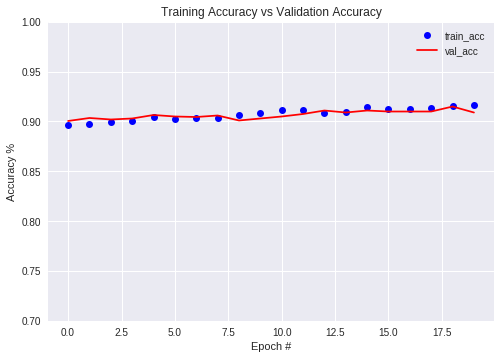

In [0]:
def epoch_accuracy(fitted_model):

  train_acc = []
  val_acc = []
  
  for i in fitted_model.history['acc']:
    train_acc.append(i)
  
  for i in fitted_model.history['val_acc']:
    val_acc.append(i)
    
  return train_acc, val_acc


model1_train_acc = epoch_accuracy(model1_fitted)[0]
model1_val_acc = epoch_accuracy(model1_fitted)[1]



plt.plot(model1_train_acc, 'bo')
plt.plot(model1_val_acc, 'r')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy %")
plt.ylim(.7,1)
plt.legend(['train_acc', 'val_acc']);

# dir(fitted_model)